Saving AS_CPP.csv to AS_CPP.csv


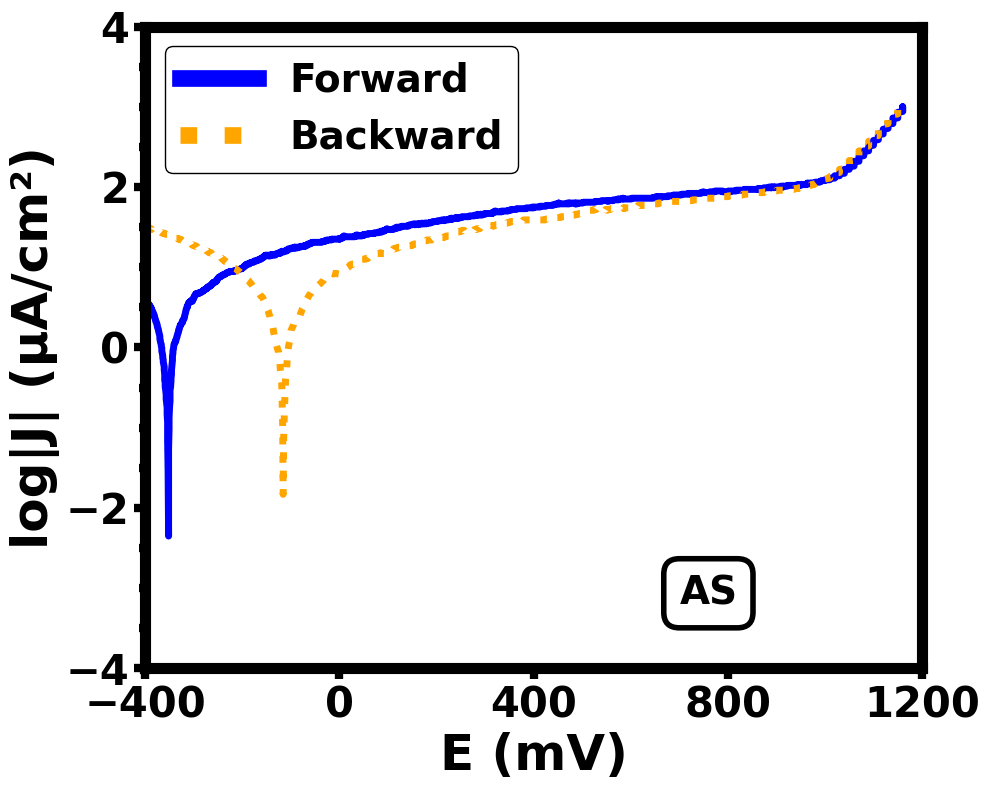

In [ ]:
# Potentiodynamic polarization plotting code for Google Colab (with file upload)
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# --- Prefer your original CSV; fallback to first uploaded .csv if name differs ---
csv_name = 'AS_CPP.csv'
if csv_name not in uploaded:
    csv_candidates = [k for k in uploaded.keys() if k.lower().endswith('.csv')]
    csv_name = csv_candidates[0] if csv_candidates else next(iter(uploaded))

# --- Load dataset (try skiprows=1 first; if that fails, retry without) ---
def try_read(path):
    try:
        df = pd.read_csv(path, skiprows=1)
        if df.shape[1] < 2:
            raise ValueError("Not enough columns after skiprows=1")
        return df
    except Exception:
        return pd.read_csv(path)

as_df = try_read(csv_name)
as_df.columns = [str(c).strip() for c in as_df.columns]

# --- Column picking (robust to naming variants) ---
def normalize(s: str) -> str:
    return (s.lower()
              .replace('µ', 'u')
              .replace('²', '2')
              .replace('^2', '2')
              .replace('cm^2', 'cm2')
              .replace('|', '')
              .replace(' ', '')
              .strip())

def pick_potential_col(df):
    for c in df.columns:
        lc = normalize(c)
        if 'ewe/mv' in lc or '(mv)' in lc or 'mv' in lc or 'potential' in lc:
            return c
    return df.select_dtypes(include='number').columns[0]

def pick_current_col(df):
    for c in df.columns:
        lc = normalize(c)
        if 'log' in lc and ('j' in lc or 'ua' in lc) and 'cm2' in lc:
            return c
    num_cols = df.select_dtypes(include='number').columns
    return num_cols[1] if len(num_cols) > 1 else num_cols[0]

pot_col  = pick_potential_col(as_df)   # e.g., "Ewe/mV" or "mV"
curr_col = pick_current_col(as_df)     # e.g., "log (|J/µA/cm2|)"

# --- Keep only needed columns and coerce to numeric ---
as_df = as_df[[pot_col, curr_col]].copy()
as_df[pot_col]  = pd.to_numeric(as_df[pot_col],  errors='coerce')
as_df[curr_col] = pd.to_numeric(as_df[curr_col], errors='coerce')
as_df = as_df.dropna()

# --- Split forward / reverse scan by first drop in potential ---
diff_pot = as_df[pot_col].diff()
neg_idx = np.where(diff_pot < 0)[0]
if len(neg_idx) > 0:
    split_idx = int(neg_idx[0])
    as_forward = as_df.iloc[:split_idx]
    as_reverse = as_df.iloc[split_idx:]
else:
    as_forward = as_df.copy()
    as_reverse = as_df.iloc[0:0]  # empty if no split detected

# --- Plotting ---
fig, ax = plt.subplots(figsize=(10, 8))

# Forward scan
ax.plot(
    as_forward[pot_col],
    as_forward[curr_col],
    label='Forward', linestyle='-', linewidth=5, color='blue'
)

# Reverse scan if present
if not as_reverse.empty:
    ax.plot(
        as_reverse[pot_col],
        as_reverse[curr_col],
        label='Backward', linestyle=':', linewidth=5, color='orange'
    )

# Labels & limits
ax.set_xlabel('E (mV)', fontsize=36, fontweight='bold')
ax.set_ylabel('log|J| (µA/cm²)', fontsize=36, fontweight='bold')
ax.set_xlim(-400, 1200)
ax.set_ylim(-4, 4)

# Ticks (majors exactly as used before) + bold 30 pt labels
ax.set_xticks([-400, 0, 400, 800, 1200])
ax.set_yticks([-4, -2, 0, 2, 4])
ax.tick_params(axis='both', which='major', direction='out', length=8, width=6, labelsize=30)
ax.tick_params(which='minor', direction='out', length=4, width=6)
for lbl in ax.get_xticklabels() + ax.get_yticklabels():
    lbl.set_fontweight('bold')

# Minor ticks
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

# Spines
for spine in ax.spines.values():
    spine.set_linewidth(8)

# Legend
leg = ax.legend(fontsize=28, frameon=True, framealpha=1, edgecolor='black', loc='best')
for line in leg.get_lines():
    line.set_linewidth(12)
for text in leg.get_texts():
    text.set_fontweight('bold')

# Annotation box
ax.text(
    700, -3.2, 'AS',
    fontsize=28, fontweight='bold',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4', linewidth=4)
)

plt.grid(False)
plt.tight_layout()
plt.show()


Saving SR500 for 1h_CPP.csv to SR500 for 1h_CPP (17).csv


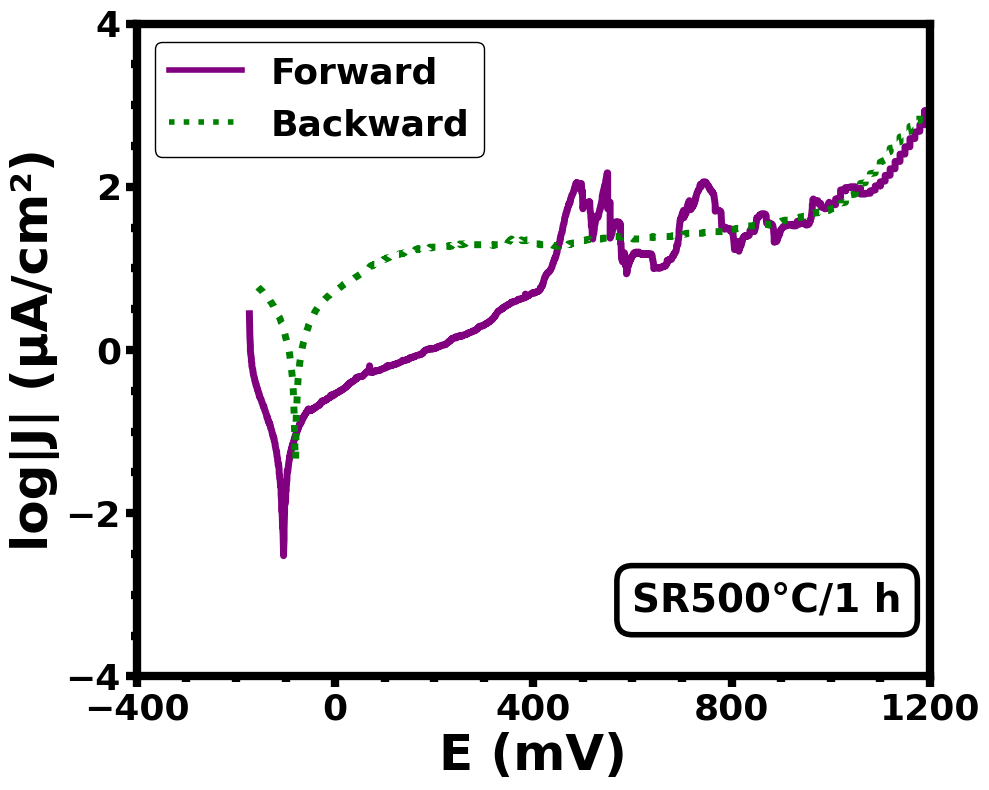

In [ ]:
# Potentiodynamic polarization plotting code for Google Colab (with file upload)

from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# --- Choose the CSV name (prefer your original; fallback to first uploaded CSV) ---
csv_name = 'SR500 for 1h_CPP.csv'
if csv_name not in uploaded:
    csv_candidates = [k for k in uploaded.keys() if k.lower().endswith('.csv')]
    csv_name = csv_candidates[0] if csv_candidates else next(iter(uploaded))

# --- Load dataset ---
sr500_df = pd.read_csv(csv_name, skiprows=1)
sr500_df.columns = ['Potential, E (mV)', 'Current density, log|J| (µA/cm²)']

# Clean numeric data
sr500_df = sr500_df.apply(pd.to_numeric, errors='coerce').dropna()

# --- Split forward / reverse scan by first drop in potential ---
sr500_diff = sr500_df['Potential, E (mV)'].diff()
neg_idx = np.where(sr500_diff < 0)[0]
if len(neg_idx) > 0:
    split_idx = neg_idx[0]
    sr500_forward = sr500_df.iloc[:split_idx]
    sr500_reverse = sr500_df.iloc[split_idx:]
else:
    sr500_forward = sr500_df.copy()
    sr500_reverse = sr500_df.iloc[0:0]  # empty

# --- Plotting ---
fig, ax = plt.subplots(figsize=(10, 8))

# Forward scan
ax.plot(
    sr500_forward['Potential, E (mV)'],
    sr500_forward['Current density, log|J| (µA/cm²)'],
    label='Forward', linestyle='-', linewidth=5, color='purple'
)

# Reverse scan (only if present)
if not sr500_reverse.empty:
    ax.plot(
        sr500_reverse['Potential, E (mV)'],
        sr500_reverse['Current density, log|J| (µA/cm²)'],
        label='Backward', linestyle=':', linewidth=5, color='green'
    )

# Labels & limits
ax.set_xlabel('E (mV)', fontsize=36, fontweight='bold')
ax.set_ylabel('log|J| (µA/cm²)', fontsize=36, fontweight='bold')
ax.set_xlim(-400, 1200)
ax.set_ylim(-4, 4)

# Ticks (majors exactly as requested) + bold 36pt labels
ax.set_xticks([-400, 0, 400, 800, 1200])
ax.set_yticks([-4, -2, 0, 2, 4])
ax.tick_params(axis='both', which='major', direction='out', length=8, width=6, labelsize=36)
ax.tick_params(which='minor', direction='out', length=4, width=6)
for lbl in ax.get_xticklabels() + ax.get_yticklabels():
    lbl.set_fontweight('bold')



ax.tick_params(axis='x', which='major', direction='out', length=8, width=6, labelsize=26)
ax.tick_params(axis='y', which='major', direction='out', length=8, width=6, labelsize=26)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax.tick_params(which='minor', direction='out', length=4, width=6)

# Spines
for spine in ax.spines.values():
    spine.set_linewidth(6)

# Legend
leg = ax.legend(fontsize=26, frameon=True, framealpha=1, edgecolor='black', loc='best')
for line in leg.get_lines():
    line.set_linewidth(4)
for text in leg.get_texts():
    text.set_fontweight('bold')

# Annotation box
ax.text(
    600, -3.2, 'SR500°C/1 h',
    fontsize=28, fontweight='bold',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4', linewidth=4)
)

plt.grid(False)
plt.tight_layout()
plt.show()


Saving SR400_CPP.xlsx to SR400_CPP (2).xlsx


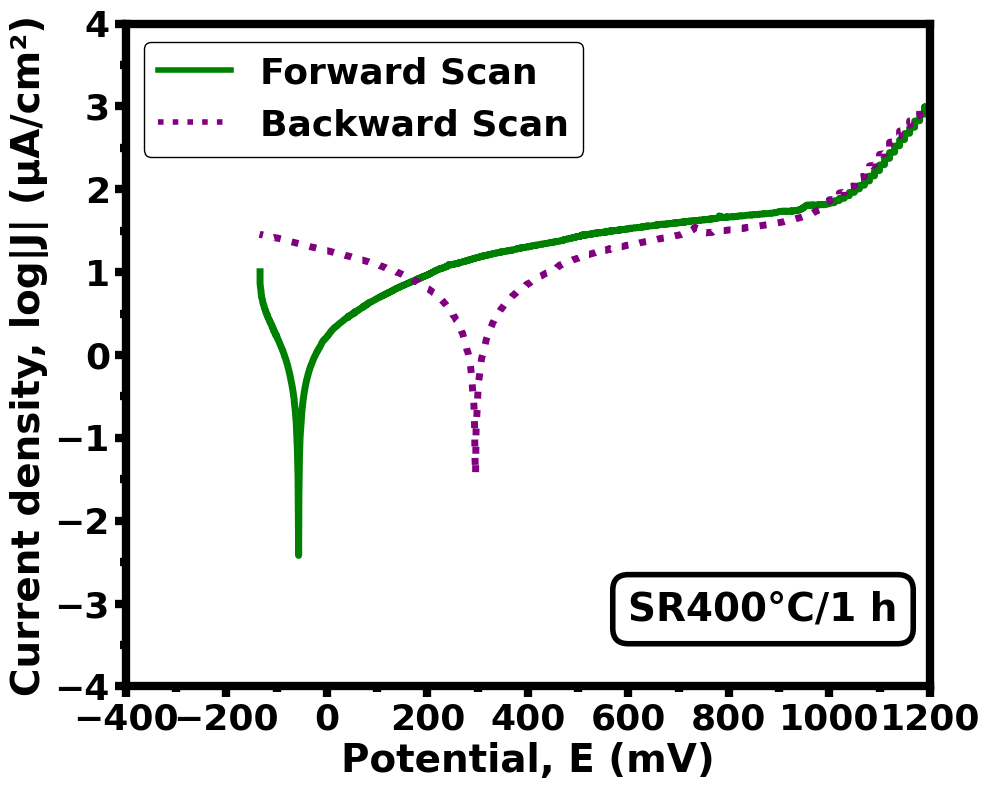

In [ ]:
# Potentiodynamic polarization plotting code for Google Colab (with file upload)
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Load SR400 dataset
sr400_df = pd.read_excel('SR400_CPP (1).xlsx') # Changed to read_excel and correct file name
sr400_df.columns = [col.strip() for col in sr400_df.columns]
sr400_diff = sr400_df['Potential, E, mV'].diff()
sr400_split_index = sr400_diff[sr400_diff < 0].index[0]
sr400_forward = sr400_df.iloc[:sr400_split_index]
sr400_reverse = sr400_df.iloc[sr400_split_index:]


# Plotting
plt.figure(figsize=(10, 8))
# SR400 plot
plt.plot(sr400_forward['Potential, E, mV'], sr400_forward['Current density, log|J|, µA/cm2'], # Corrected column name
         label='Forward Scan', linestyle='-', linewidth=5, color='green') # Changed color to green
plt.plot(sr400_reverse['Potential, E, mV'], sr400_reverse['Current density, log|J|, µA/cm2'], # Corrected column name
         label='Backward Scan', linestyle=':', linewidth=5, color='purple') # Changed color to purple


plt.xlabel('Potential, E (mV)', fontsize=28, fontweight='bold')
plt.ylabel('Current density, log|J| (µA/cm²)', fontsize=28, fontweight='bold')
plt.xticks(np.array([-400, -200, 0, 200, 400, 600, 800, 1000, 1200]), fontsize=26, fontweight='bold')
plt.yticks(np.arange(-4, 5, 1), fontsize=26, fontweight='bold')
plt.xlim(-400, 1200)
plt.ylim(-4, 4)
plt.legend(fontsize=26, frameon=True, framealpha=1, edgecolor='black', loc='best')

# Customize legend lines and font weight
legend = plt.gca().get_legend()
for line in legend.get_lines():
    line.set_linewidth(4)
for text in legend.get_texts():
    text.set_fontweight('bold')

# Set spine (frame) width
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(6)

# Customize ticks
ax.tick_params(which='major', direction='out', length=8, width=6)
ax.tick_params(which='minor', direction='out', length=4, width=6)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

plt.grid(False)
plt.text(600, -3.2, 'SR400°C/1 h', fontsize=28, fontweight='bold',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4', linewidth=4))
plt.tight_layout()
plt.show()

Saving SR400_CPP.xlsx to SR400_CPP (4).xlsx


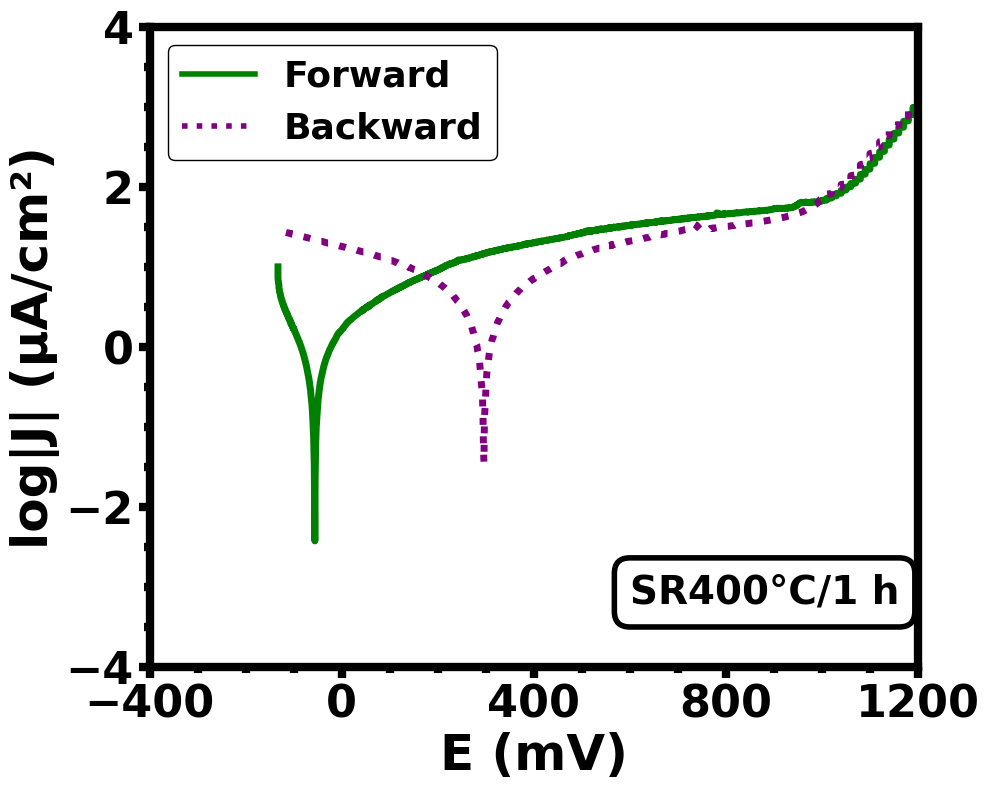

In [ ]:
# Potentiodynamic polarization plotting code for Google Colab (with file upload)
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# --- Choose the Excel name (prefer your original; fallback to first uploaded .xlsx or any file) ---
xlsx_name = 'SR400_CPP (1).xlsx'
if xlsx_name not in uploaded:
    xlsx_candidates = [k for k in uploaded.keys() if k.lower().endswith(('.xlsx', '.xls'))]
    xlsx_name = xlsx_candidates[0] if xlsx_candidates else next(iter(uploaded))

# --- Load dataset ---
sr400_df = pd.read_excel(xlsx_name)
sr400_df.columns = [str(c).strip() for c in sr400_df.columns]

# --- Pick columns robustly ---
def pick_col(df, must_have_terms, fallback_idx):
    for c in df.columns:
        lc = c.lower().replace('²', '2')  # normalize superscripts
        if all(term in lc for term in must_have_terms):
            return c
    # try partials
    for c in df.columns:
        lc = c.lower().replace('²', '2')
        if any(term in lc for term in must_have_terms):
            return c
    # fallback to position
    return df.columns[fallback_idx]

# Common naming variants it will catch:
# Potential: "Potential, E, mV", "Potential, E (mV)", "E (mV)", "Potential (mV)"...
# Current:   "Current density, log|J|, µA/cm2", "Current density, log|J| (µA/cm²)"...
pot_col  = pick_col(sr400_df, ['potential'], 0) or pick_col(sr400_df, ['e', 'mv'], 0)
curr_col = pick_col(sr400_df, ['current', 'log|j|'], 1)

# --- Keep only the needed columns and coerce to numeric ---
sr400_df = sr400_df[[pot_col, curr_col]].copy()
sr400_df[pot_col]  = pd.to_numeric(sr400_df[pot_col],  errors='coerce')
sr400_df[curr_col] = pd.to_numeric(sr400_df[curr_col], errors='coerce')
sr400_df = sr400_df.dropna()

# --- Split forward / reverse scan by first drop in potential ---
diff_pot = sr400_df[pot_col].diff()
neg_idx = np.where(diff_pot < 0)[0]
if len(neg_idx) > 0:
    split_idx = int(neg_idx[0])
    sr400_forward = sr400_df.iloc[:split_idx]
    sr400_reverse = sr400_df.iloc[split_idx:]
else:
    sr400_forward = sr400_df.copy()
    sr400_reverse = sr400_df.iloc[0:0]  # empty reverse if no drop detected

# --- Plotting ---
fig, ax = plt.subplots(figsize=(10, 8))

# Forward scan
ax.plot(
    sr400_forward[pot_col],
    sr400_forward[curr_col],
    label='Forward', linestyle='-', linewidth=5, color='green'
)

# Reverse scan (only if present)
if not sr400_reverse.empty:
    ax.plot(
        sr400_reverse[pot_col],
        sr400_reverse[curr_col],
        label='Backward', linestyle=':', linewidth=5, color='purple'
    )

# Labels & limits
ax.set_xlabel('E (mV)', fontsize=36, fontweight='bold')
ax.set_ylabel('log|J| (µA/cm²)',    fontsize=36, fontweight='bold')
ax.set_xlim(-400, 1200)
ax.set_ylim(-4, 4)

# Ticks (majors exactly as requested) + bold 32 pt labels
ax.set_xticks([-400, 0, 400, 800, 1200])
ax.set_yticks([-4, -2, 0, 2, 4])
ax.tick_params(axis='both', which='major', direction='out', length=8, width=6, labelsize=32)
ax.tick_params(which='minor', direction='out', length=4, width=6)
for lbl in ax.get_xticklabels() + ax.get_yticklabels():
    lbl.set_fontweight('bold')

# Minor ticks
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

# Spines
for spine in ax.spines.values():
    spine.set_linewidth(6)

# Legend
leg = ax.legend(fontsize=26, frameon=True, framealpha=1, edgecolor='black', loc='best')
for line in leg.get_lines():
    line.set_linewidth(4)
for text in leg.get_texts():
    text.set_fontweight('bold')

# Annotation box
ax.text(
    600, -3.2, 'SR400°C/1 h',
    fontsize=28, fontweight='bold',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4', linewidth=4)
)

plt.grid(False)
plt.tight_layout()
plt.show()


Saving SR450_CPP_new.csv to SR450_CPP_new (2).csv


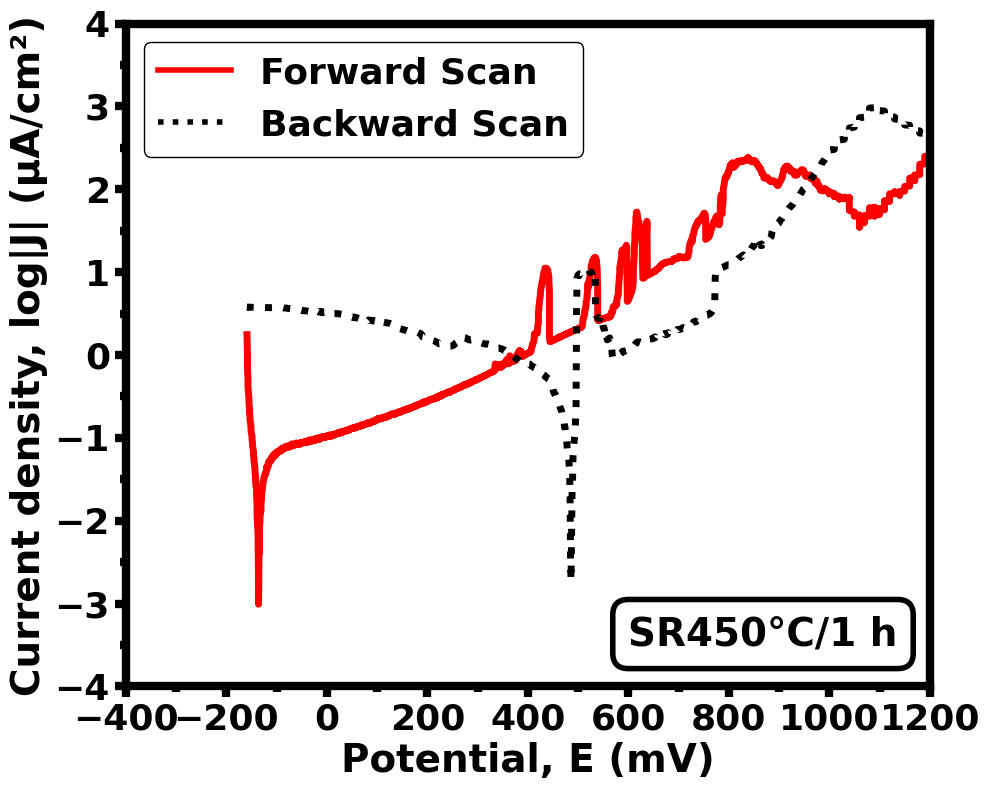

In [ ]:
# Potentiodynamic polarization plotting code for Google Colab (with file upload)
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Load SR450 dataset
sr450_df = pd.read_csv('SR450_CPP_new (1).csv') # Changed file name to SR450_CPP_new (1).csv
sr450_df.columns = [col.strip() for col in sr450_df.columns]
sr450_diff = sr450_df['mV'].diff()
sr450_split_index = sr450_diff[sr450_diff < 0].index[0]
sr450_forward = sr450_df.iloc[:sr450_split_index]
sr450_reverse = sr450_df.iloc[sr450_split_index:]

# Plotting
plt.figure(figsize=(10, 8))
# SR450 plot
plt.plot(sr450_forward['mV'], sr450_forward['log |µA/cm2|'],
         label='Forward Scan', linestyle='-', linewidth=5, color='red') # Changed color to red
plt.plot(sr450_reverse['mV'], sr450_reverse['log |µA/cm2|'],
         label='Backward Scan', linestyle=':', linewidth=5, color='black') # Changed color to black

plt.xlabel('Potential, E (mV)', fontsize=28, fontweight='bold')
plt.ylabel('Current density, log|J| (µA/cm²)', fontsize=28, fontweight='bold')
plt.xticks(np.array([-400, -200, 0, 200, 400, 600, 800, 1000, 1200]), fontsize=26, fontweight='bold')
plt.yticks(np.arange(-4, 5, 1), fontsize=26, fontweight='bold')
plt.xlim(-400, 1200)
plt.ylim(-4, 4)
plt.legend(fontsize=26, frameon=True, framealpha=1, edgecolor='black', loc='best')

# Customize legend lines and font weight
legend = plt.gca().get_legend()
for line in legend.get_lines():
    line.set_linewidth(4)
for text in legend.get_texts():
    text.set_fontweight('bold')

# Set spine (frame) width
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(6)

# Customize ticks
ax.tick_params(which='major', direction='out', length=8, width=6)
ax.tick_params(which='minor', direction='out', length=4, width=6)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

plt.grid(False)
plt.text(600, -3.5, 'SR450°C/1 h', fontsize=28, fontweight='bold',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4', linewidth=4))
plt.tight_layout()
plt.show()

Saving SR450_CPP_new.csv to SR450_CPP_new (6).csv


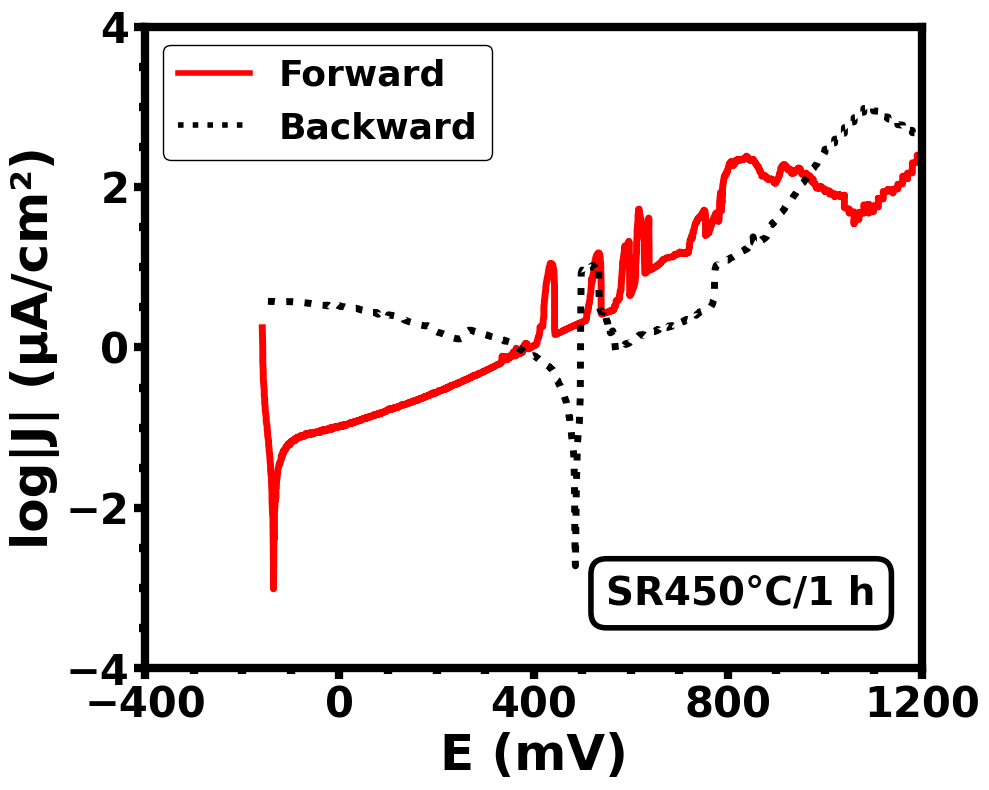

In [ ]:
# Potentiodynamic polarization plotting code for Google Colab (with file upload)
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# --- Prefer your original CSV; fallback to first uploaded .csv if name differs ---
csv_name = 'SR450_CPP_new (1).csv'
if csv_name not in uploaded:
    csv_candidates = [k for k in uploaded.keys() if k.lower().endswith('.csv')]
    csv_name = csv_candidates[0] if csv_candidates else next(iter(uploaded))

# --- Load dataset ---
sr450_df = pd.read_csv(csv_name)
sr450_df.columns = [str(c).strip() for c in sr450_df.columns]

# --- Column picking (robust to naming variants) ---
def normalize(s: str) -> str:
    return (s.lower()
              .replace('µ', 'u')
              .replace('²', '2')
              .replace('^2', '2')
              .replace('cm^2', 'cm2')
              .replace('|', '')
              .strip())

def pick_potential_col(df):
    for c in df.columns:
        lc = normalize(c)
        if 'mv' in lc or 'potential' in lc or '(mv)' in lc or 'e (mv)' in lc:
            return c
    # fallback: first numeric column
    return df.select_dtypes(include='number').columns[0]

def pick_current_col(df):
    for c in df.columns:
        lc = normalize(c)
        if 'log' in lc and ('j' in lc or 'ua' in lc) and 'cm2' in lc:
            return c
    # common simple variant like "log |µA/cm2|"
    for c in df.columns:
        lc = normalize(c)
        if 'log' in lc:
            return c
    # fallback: second numeric column if exists
    num_cols = df.select_dtypes(include='number').columns
    return num_cols[1] if len(num_cols) > 1 else num_cols[0]

pot_col  = pick_potential_col(sr450_df)
curr_col = pick_current_col(sr450_df)

# --- Keep only the needed columns and coerce to numeric ---
sr450_df = sr450_df[[pot_col, curr_col]].copy()
sr450_df[pot_col]  = pd.to_numeric(sr450_df[pot_col],  errors='coerce')
sr450_df[curr_col] = pd.to_numeric(sr450_df[curr_col], errors='coerce')
sr450_df = sr450_df.dropna()

# --- Split forward / reverse scan by first drop in potential ---
diff_pot = sr450_df[pot_col].diff()
neg_idx = np.where(diff_pot < 0)[0]
if len(neg_idx) > 0:
    split_idx = int(neg_idx[0])
    sr450_forward = sr450_df.iloc[:split_idx]
    sr450_reverse = sr450_df.iloc[split_idx:]
else:
    sr450_forward = sr450_df.copy()
    sr450_reverse = sr450_df.iloc[0:0]  # empty if no split detected

# --- Plotting ---
fig, ax = plt.subplots(figsize=(10, 8))

# Forward scan (red)
ax.plot(
    sr450_forward[pot_col],
    sr450_forward[curr_col],
    label='Forward', linestyle='-', linewidth=5, color='red'
)

# Reverse scan (black) if present
if not sr450_reverse.empty:
    ax.plot(
        sr450_reverse[pot_col],
        sr450_reverse[curr_col],
        label='Backward', linestyle=':', linewidth=5, color='black'
    )

# Labels & limits
ax.set_xlabel('E (mV)', fontsize=36, fontweight='bold')
ax.set_ylabel('log|J| (µA/cm²)',    fontsize=36, fontweight='bold')
ax.set_xlim(-400, 1200)
ax.set_ylim(-4, 4)

# Ticks (majors exactly as requested) + bold 30 pt labels
ax.set_xticks([-400, 0, 400, 800, 1200])
ax.set_yticks([-4, -2, 0, 2, 4])
ax.tick_params(axis='both', which='major', direction='out', length=8, width=6, labelsize=30)
ax.tick_params(which='minor', direction='out', length=4, width=6)
for lbl in ax.get_xticklabels() + ax.get_yticklabels():
    lbl.set_fontweight('bold')

# Minor ticks
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

# Spines
for spine in ax.spines.values():
    spine.set_linewidth(6)

# Legend
leg = ax.legend(fontsize=26, frameon=True, framealpha=1, edgecolor='black', loc='best')
for line in leg.get_lines():
    line.set_linewidth(4)
for text in leg.get_texts():
    text.set_fontweight('bold')

# Annotation box
ax.text(
    550, -3.2, 'SR450°C/1 h',
    fontsize=28, fontweight='bold',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4', linewidth=4)
)

plt.grid(False)
plt.tight_layout()
plt.show()


Saving SR550_CPP.csv to SR550_CPP (1).csv


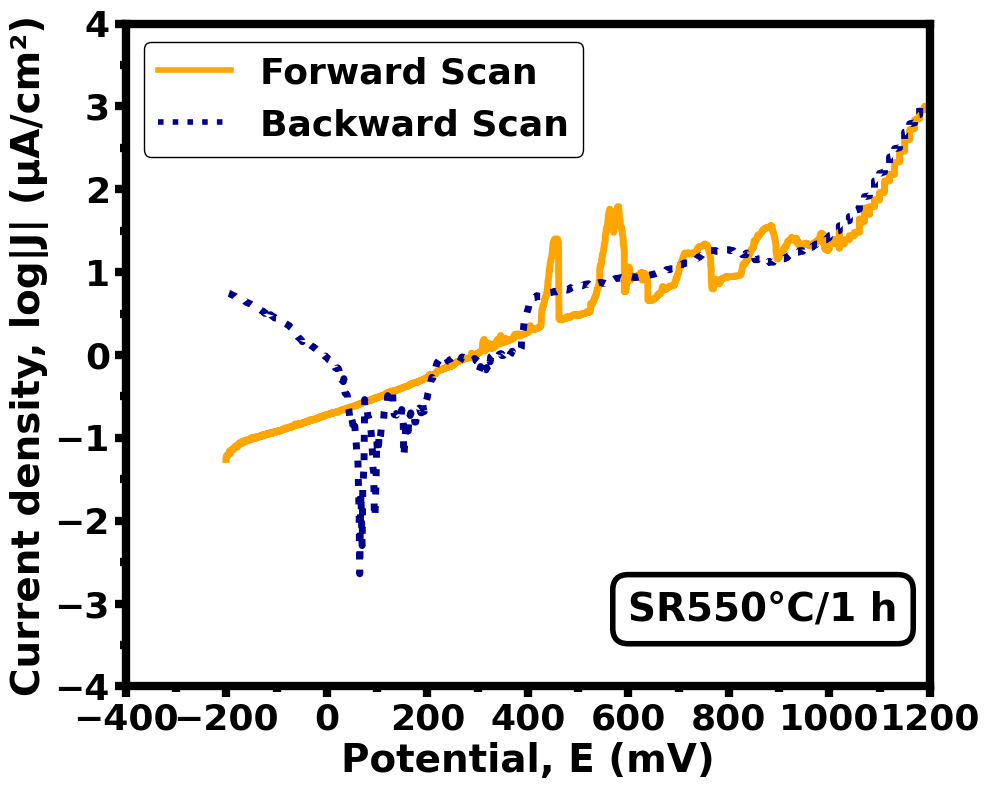

In [ ]:
# Potentiodynamic polarization plotting code for Google Colab (with file upload)
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Load SR550 dataset
sr550_df = pd.read_csv('SR550_CPP.csv')
sr550_df.columns = [col.strip() for col in sr550_df.columns]
sr550_diff = sr550_df['Ewe/mV'].diff()
sr550_split_index = sr550_diff[sr550_diff < 0].index[0]
sr550_forward = sr550_df.iloc[:sr550_split_index]
sr550_reverse = sr550_df.iloc[sr550_split_index:]

# Plotting
plt.figure(figsize=(10, 8))
# SR550 plot
plt.plot(sr550_forward['Ewe/mV'], sr550_forward['log (|J/µA/cm2|)'],
         label='Forward Scan', linestyle='-', linewidth=5, color='orange') # Changed color to orange
plt.plot(sr550_reverse['Ewe/mV'], sr550_reverse['log (|J/µA/cm2|)'],
         label='Backward Scan', linestyle=':', linewidth=5, color='darkblue') # Changed color to darkblue

plt.xlabel('Potential, E (mV)', fontsize=28, fontweight='bold')
plt.ylabel('Current density, log|J| (µA/cm²)', fontsize=28, fontweight='bold')
plt.xticks(np.array([-400, -200, 0, 200, 400, 600, 800, 1000, 1200]), fontsize=26, fontweight='bold')
plt.yticks(np.arange(-4, 5, 1), fontsize=26, fontweight='bold')
plt.xlim(-400, 1200)
plt.ylim(-4, 4)
plt.legend(fontsize=26, frameon=True, framealpha=1, edgecolor='black', loc='best')

# Customize legend lines and font weight
legend = plt.gca().get_legend()
for line in legend.get_lines():
    line.set_linewidth(4)
for text in legend.get_texts():
    text.set_fontweight('bold')

# Set spine (frame) width
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(6)

# Customize ticks
ax.tick_params(which='major', direction='out', length=8, width=6)
ax.tick_params(which='minor', direction='out', length=4, width=6)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

plt.grid(False)
plt.text(600, -3.2, 'SR550°C/1 h', fontsize=28, fontweight='bold',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4', linewidth=4))
plt.tight_layout()
plt.show()

Saving SR550_CPP.csv to SR550_CPP (1).csv


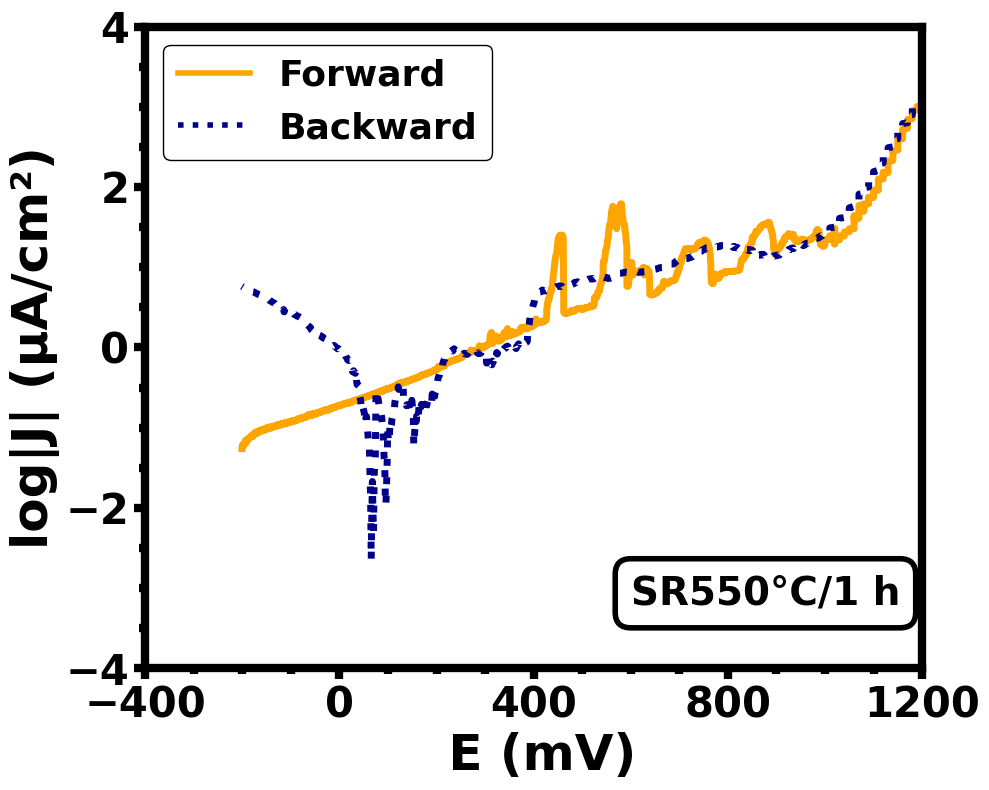

In [ ]:
# Potentiodynamic polarization plotting code for Google Colab (with file upload)
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# --- Prefer your original CSV; fallback to first uploaded .csv if name differs ---
csv_name = 'SR550_CPP.csv'
if csv_name not in uploaded:
    csv_candidates = [k for k in uploaded.keys() if k.lower().endswith('.csv')]
    csv_name = csv_candidates[0] if csv_candidates else next(iter(uploaded))

# --- Load dataset ---
sr550_df = pd.read_csv(csv_name)
sr550_df.columns = [str(c).strip() for c in sr550_df.columns]

# --- Column picking (robust to naming variants) ---
def normalize(s: str) -> str:
    return (s.lower()
              .replace('µ', 'u')
              .replace('²', '2')
              .replace('^2', '2')
              .replace('cm^2', 'cm2')
              .replace('|', '')
              .replace(' ', '')
              .strip())

def pick_potential_col(df):
    # Look for "Ewe/mV", "E (mV)", "Potential", "mV", etc.
    for c in df.columns:
        lc = normalize(c)
        if 'ewe/mv' in lc or '(mv)' in lc or 'mv' in lc or 'potential' in lc:
            return c
    # fallback: first numeric column
    return df.select_dtypes(include='number').columns[0]

def pick_current_col(df):
    # Look for "log (|J/µA/cm2|)" variants
    for c in df.columns:
        lc = normalize(c)
        if 'log' in lc and ('j' in lc or 'ua' in lc) and 'cm2' in lc:
            return c
    # fallback: second numeric column if exists
    num_cols = df.select_dtypes(include='number').columns
    return num_cols[1] if len(num_cols) > 1 else num_cols[0]

pot_col  = pick_potential_col(sr550_df)
curr_col = pick_current_col(sr550_df)

# --- Keep only needed columns and coerce to numeric ---
sr550_df = sr550_df[[pot_col, curr_col]].copy()
sr550_df[pot_col]  = pd.to_numeric(sr550_df[pot_col],  errors='coerce')
sr550_df[curr_col] = pd.to_numeric(sr550_df[curr_col], errors='coerce')
sr550_df = sr550_df.dropna()

# --- Split forward / reverse scan by first drop in potential ---
diff_pot = sr550_df[pot_col].diff()
neg_idx = np.where(diff_pot < 0)[0]
if len(neg_idx) > 0:
    split_idx = int(neg_idx[0])
    sr550_forward = sr550_df.iloc[:split_idx]
    sr550_reverse = sr550_df.iloc[split_idx:]
else:
    sr550_forward = sr550_df.copy()
    sr550_reverse = sr550_df.iloc[0:0]  # empty if no split detected

# --- Plotting ---
fig, ax = plt.subplots(figsize=(10, 8))

# Forward scan (orange)
ax.plot(
    sr550_forward[pot_col],
    sr550_forward[curr_col],
    label='Forward', linestyle='-', linewidth=5, color='orange'
)

# Reverse scan (dark blue) if present
if not sr550_reverse.empty:
    ax.plot(
        sr550_reverse[pot_col],
        sr550_reverse[curr_col],
        label='Backward', linestyle=':', linewidth=5, color='darkblue'
    )

# Labels & limits
ax.set_xlabel(' E (mV)', fontsize=36, fontweight='bold')
ax.set_ylabel('log|J| (µA/cm²)',    fontsize=36, fontweight='bold')
ax.set_xlim(-400, 1200)
ax.set_ylim(-4, 4)

# Ticks (majors exactly as requested) + bold 30 pt labels
ax.set_xticks([-400, 0, 400, 800, 1200])
ax.set_yticks([-4, -2, 0, 2, 4])
ax.tick_params(axis='both', which='major', direction='out', length=8, width=6, labelsize=30)
ax.tick_params(which='minor', direction='out', length=4, width=6)
for lbl in ax.get_xticklabels() + ax.get_yticklabels():
    lbl.set_fontweight('bold')

# Minor ticks
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

# Spines
for spine in ax.spines.values():
    spine.set_linewidth(6)

# Legend
leg = ax.legend(fontsize=26, frameon=True, framealpha=1, edgecolor='black', loc='best')
for line in leg.get_lines():
    line.set_linewidth(4)
for text in leg.get_texts():
    text.set_fontweight('bold')

# Annotation box
ax.text(
    600, -3.2, 'SR550°C/1 h',
    fontsize=28, fontweight='bold',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4', linewidth=4)
)

plt.grid(False)
plt.tight_layout()
plt.show()


Saving SA_CPP.csv to SA_CPP (19).csv


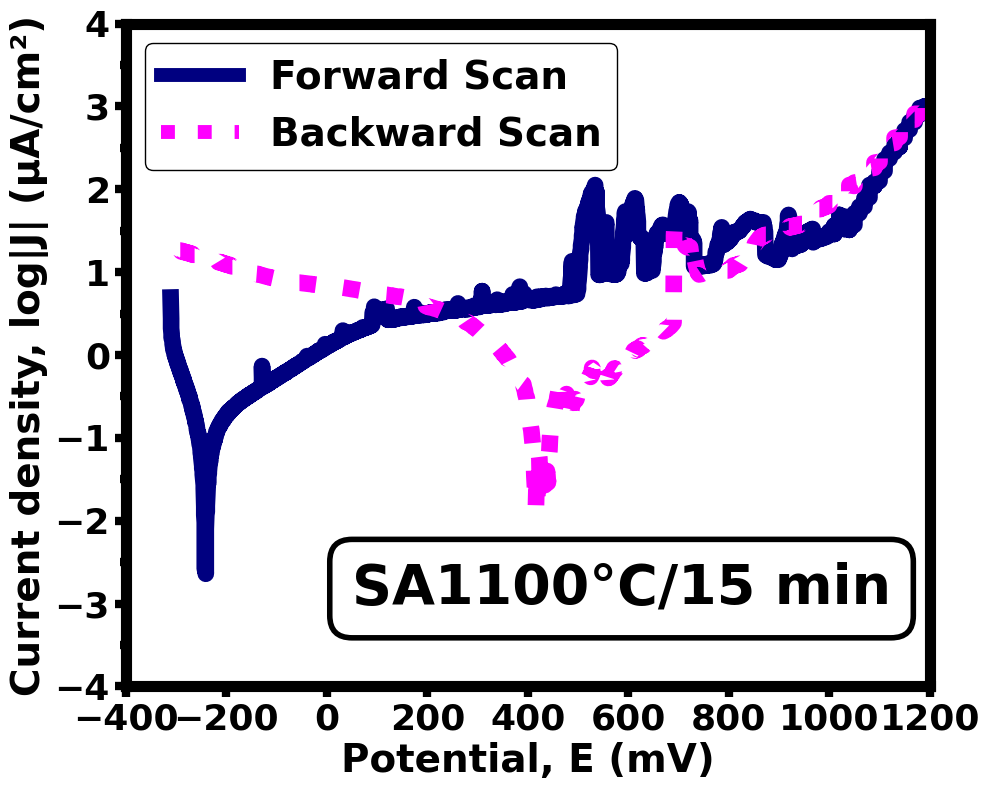

In [ ]:
# Potentiodynamic polarization plotting code for Google Colab (with file upload)
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Load SA1100 dataset
sa1100_df = pd.read_csv('SA_CPP.csv', skiprows=1)
sa1100_df.columns = [col.strip() for col in sa1100_df.columns]
sa1100_diff = sa1100_df['Ewe/mV'].diff()
sa1100_split_index = sa1100_diff[sa1100_diff < 0].index[0]
sa1100_forward = sa1100_df.iloc[:sa1100_split_index]
sa1100_reverse = sa1100_df.iloc[sa1100_split_index:]

# Plotting
plt.figure(figsize=(10, 8))
# SA1100 plot
plt.plot(sa1100_forward['Ewe/mV'], sa1100_forward['log (|J/µA/cm2|)'],
         label='Forward Scan', linestyle='-', linewidth=12, color='navy') # Changed color to navy
plt.plot(sa1100_reverse['Ewe/mV'], sa1100_reverse['log (|J/µA/cm2|)'],
         label='Backward Scan', linestyle=':', linewidth=12, color='magenta') # Changed color to magenta

plt.xlabel('Potential, E (mV)', fontsize=28, fontweight='bold')
plt.ylabel('Current density, log|J| (µA/cm²)', fontsize=28, fontweight='bold')
plt.xticks(np.array([-400, -200, 0, 200, 400, 600, 800, 1000, 1200]), fontsize=26, fontweight='bold')
plt.yticks(np.arange(-4, 5, 1), fontsize=26, fontweight='bold')
plt.xlim(-400, 1200)
plt.ylim(-4, 4)
plt.legend(fontsize=28, frameon=True, framealpha=1, edgecolor='black', loc='best')

# Customize legend lines and font weight
legend = plt.gca().get_legend()
for line in legend.get_lines():
    line.set_linewidth(10)
for text in legend.get_texts():
    text.set_fontweight('bold')

# Set spine (frame) width
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(8)

# Customize ticks
ax.tick_params(which='major', direction='out', length=8, width=6)
ax.tick_params(which='minor', direction='out', length=4, width=6)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

plt.grid(False)
plt.text(50, -3, 'SA1100°C/15 min', fontsize=40, fontweight='bold',
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4', linewidth=4))
plt.tight_layout()
plt.show()

Saving SA_CPP.csv to SA_CPP.csv


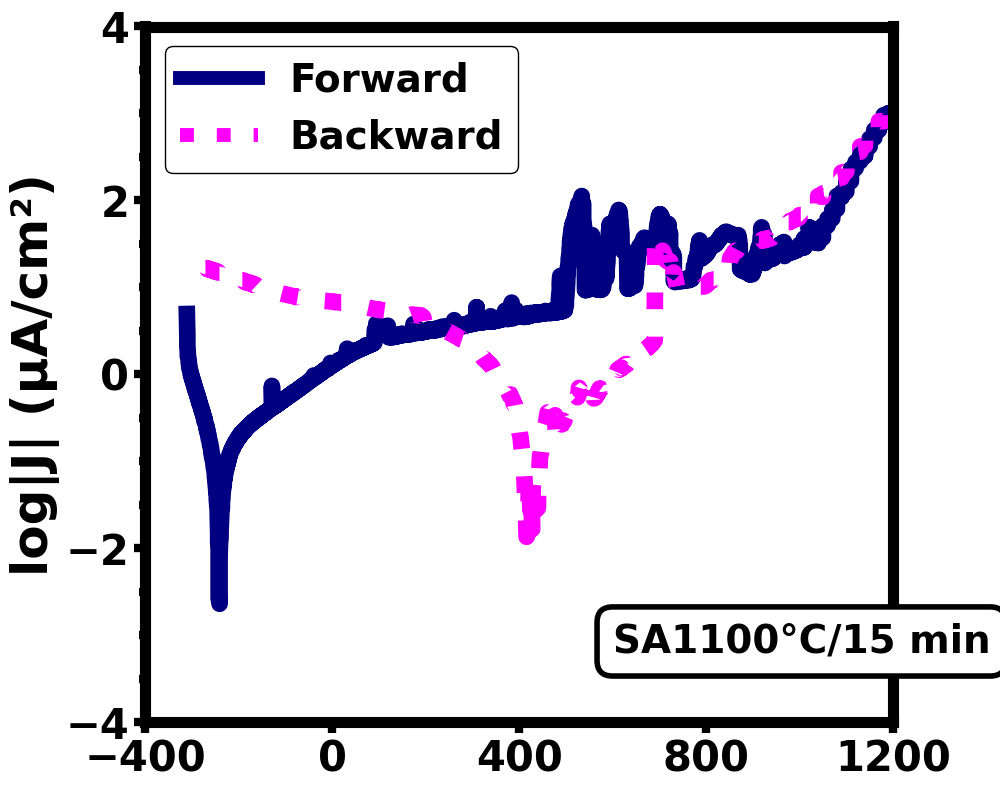

In [ ]:
# Potentiodynamic polarization plotting code for Google Colab (with file upload)
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# --- Prefer your original CSV; fallback to first uploaded .csv if name differs ---
csv_name = 'SA_CPP.csv'
if csv_name not in uploaded:
    csv_candidates = [k for k in uploaded.keys() if k.lower().endswith('.csv')]
    csv_name = csv_candidates[0] if csv_candidates else next(iter(uploaded))

# --- Load dataset (try skiprows=1 first; if that fails, retry without) ---
def try_read(path):
    try:
        df = pd.read_csv(path, skiprows=1)
        if df.shape[1] < 2:
            raise ValueError("Not enough columns after skiprows=1")
        return df
    except Exception:
        return pd.read_csv(path)

sa1100_df = try_read(csv_name)
sa1100_df.columns = [str(c).strip() for c in sa1100_df.columns]

# --- Column picking (robust to naming variants) ---
def normalize(s: str) -> str:
    return (s.lower()
              .replace('µ', 'u')
              .replace('²', '2')
              .replace('^2', '2')
              .replace('cm^2', 'cm2')
              .replace('|', '')
              .replace(' ', '')
              .strip())

def pick_potential_col(df):
    for c in df.columns:
        lc = normalize(c)
        if 'ewe/mv' in lc or '(mv)' in lc or 'mv' in lc or 'potential' in lc:
            return c
    return df.select_dtypes(include='number').columns[0]

def pick_current_col(df):
    for c in df.columns:
        lc = normalize(c)
        if 'log' in lc and ('j' in lc or 'ua' in lc) and 'cm2' in lc:
            return c
    num_cols = df.select_dtypes(include='number').columns
    return num_cols[1] if len(num_cols) > 1 else num_cols[0]

pot_col  = pick_potential_col(sa1100_df)       # e.g., "Ewe/mV"
curr_col = pick_current_col(sa1100_df)         # e.g., "log (|J/µA/cm2|)"

# --- Keep only needed columns and coerce to numeric ---
sa1100_df = sa1100_df[[pot_col, curr_col]].copy()
sa1100_df[pot_col]  = pd.to_numeric(sa1100_df[pot_col],  errors='coerce')
sa1100_df[curr_col] = pd.to_numeric(sa1100_df[curr_col], errors='coerce')
sa1100_df = sa1100_df.dropna()

# --- Split forward / reverse scan by first drop in potential ---
diff_pot = sa1100_df[pot_col].diff()
neg_idx = np.where(diff_pot < 0)[0]
if len(neg_idx) > 0:
    split_idx = int(neg_idx[0])
    sa1100_forward = sa1100_df.iloc[:split_idx]
    sa1100_reverse = sa1100_df.iloc[split_idx:]
else:
    sa1100_forward = sa1100_df.copy()
    sa1100_reverse = sa1100_df.iloc[0:0]  # empty if no split detected

# --- Plotting ---
fig, ax = plt.subplots(figsize=(10, 8))

# Forward scan (navy)
ax.plot(
    sa1100_forward[pot_col],
    sa1100_forward[curr_col],
    label='Forward', linestyle='-', linewidth=12, color='navy'
)

# Reverse scan (magenta) if present
if not sa1100_reverse.empty:
    ax.plot(
        sa1100_reverse[pot_col],
        sa1100_reverse[curr_col],
        label='Backward', linestyle=':', linewidth=12, color='magenta'
    )

# Labels & limits (REMOVE X-AXIS LABEL)
# ax.set_xlabel('Potential, E (mV)')  # intentionally omitted
ax.set_ylabel('log|J| (µA/cm²)', fontsize=36, fontweight='bold')
ax.set_xlim(-400, 1200)
ax.set_ylim(-4, 4)

# Ticks (majors exactly as used before) + bold 30 pt labels
ax.set_xticks([-400, 0, 400, 800, 1200])
ax.set_yticks([-4, -2, 0, 2, 4])
ax.tick_params(axis='both', which='major', direction='out', length=8, width=6, labelsize=30)
ax.tick_params(which='minor', direction='out', length=4, width=6)
for lbl in ax.get_xticklabels() + ax.get_yticklabels():
    lbl.set_fontweight('bold')

# Minor ticks
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

# Spines
for spine in ax.spines.values():
    spine.set_linewidth(8)

# Legend
leg = ax.legend(fontsize=28, frameon=True, framealpha=1, edgecolor='black', loc='best')
for line in leg.get_lines():
    line.set_linewidth(10)
for text in leg.get_texts():
    text.set_fontweight('bold')

# Annotation box
ax.text(
    600, -3.2, 'SA1100°C/15 min',
    fontsize=28, fontweight='bold',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4', linewidth=4)
)

plt.grid(False)
plt.tight_layout()
plt.show()


Saving SA_CPP.csv to SA_CPP.csv


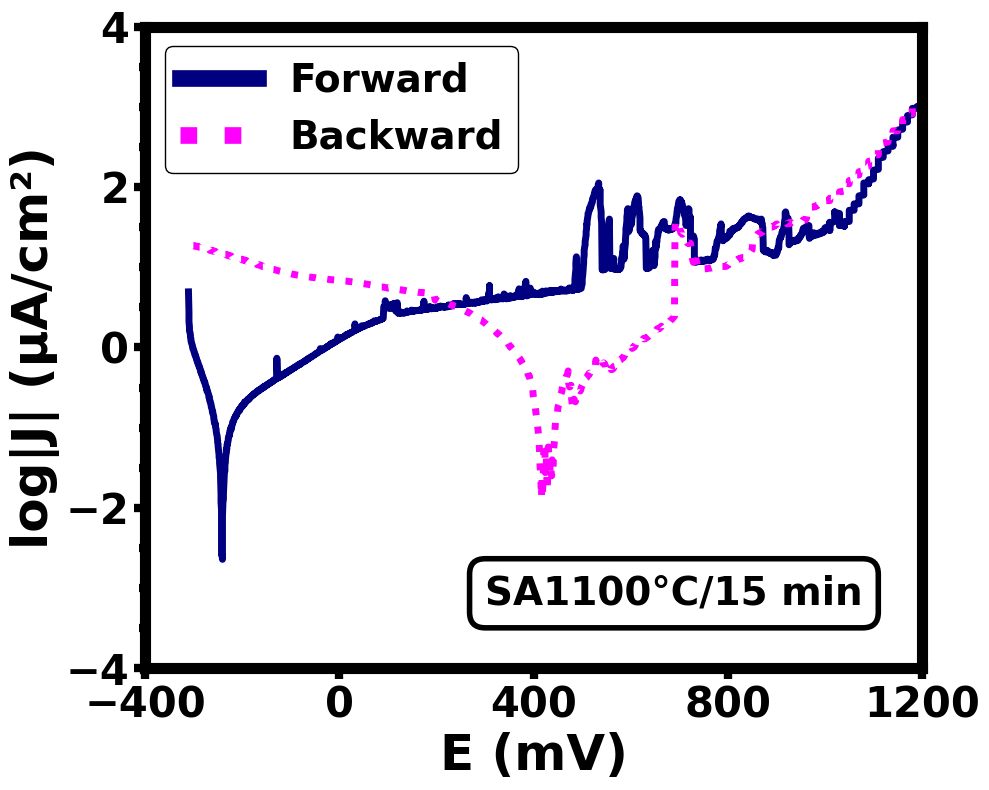

In [ ]:
# Potentiodynamic polarization plotting code for Google Colab (with file upload)
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# --- Prefer your original CSV; fallback to first uploaded .csv if name differs ---
csv_name = 'SA_CPP.csv'
if csv_name not in uploaded:
    csv_candidates = [k for k in uploaded.keys() if k.lower().endswith('.csv')]
    csv_name = csv_candidates[0] if csv_candidates else next(iter(uploaded))

# --- Load dataset (try skiprows=1 first; if that fails, retry without) ---
def try_read(path):
    try:
        df = pd.read_csv(path, skiprows=1)
        if df.shape[1] < 2:
            raise ValueError("Not enough columns after skiprows=1")
        return df
    except Exception:
        return pd.read_csv(path)

sa1100_df = try_read(csv_name)
sa1100_df.columns = [str(c).strip() for c in sa1100_df.columns]

# --- Column picking (robust to naming variants) ---
def normalize(s: str) -> str:
    return (s.lower()
              .replace('µ', 'u')
              .replace('²', '2')
              .replace('^2', '2')
              .replace('cm^2', 'cm2')
              .replace('|', '')
              .replace(' ', '')
              .strip())

def pick_potential_col(df):
    for c in df.columns:
        lc = normalize(c)
        if 'ewe/mv' in lc or '(mv)' in lc or 'mv' in lc or 'potential' in lc:
            return c
    return df.select_dtypes(include='number').columns[0]

def pick_current_col(df):
    for c in df.columns:
        lc = normalize(c)
        if 'log' in lc and ('j' in lc or 'ua' in lc) and 'cm2' in lc:
            return c
    num_cols = df.select_dtypes(include='number').columns
    return num_cols[1] if len(num_cols) > 1 else num_cols[0]

pot_col  = pick_potential_col(sa1100_df)       # e.g., "Ewe/mV"
curr_col = pick_current_col(sa1100_df)         # e.g., "log (|J/µA/cm2|)"

# --- Keep only needed columns and coerce to numeric ---
sa1100_df = sa1100_df[[pot_col, curr_col]].copy()
sa1100_df[pot_col]  = pd.to_numeric(sa1100_df[pot_col],  errors='coerce')
sa1100_df[curr_col] = pd.to_numeric(sa1100_df[curr_col], errors='coerce')
sa1100_df = sa1100_df.dropna()

# --- Split forward / reverse scan by first drop in potential ---
diff_pot = sa1100_df[pot_col].diff()
neg_idx = np.where(diff_pot < 0)[0]
if len(neg_idx) > 0:
    split_idx = int(neg_idx[0])
    sa1100_forward = sa1100_df.iloc[:split_idx]
    sa1100_reverse = sa1100_df.iloc[split_idx:]
else:
    sa1100_forward = sa1100_df.copy()
    sa1100_reverse = sa1100_df.iloc[0:0]  # empty if no split detected

# --- Plotting ---
fig, ax = plt.subplots(figsize=(10, 8))

# Forward scan (navy)
ax.plot(
    sa1100_forward[pot_col],
    sa1100_forward[curr_col],
    label='Forward', linestyle='-', linewidth=5, color='navy'
)

# Reverse scan (magenta) if present
if not sa1100_reverse.empty:
    ax.plot(
        sa1100_reverse[pot_col],
        sa1100_reverse[curr_col],
        label='Backward', linestyle=':', linewidth=5, color='magenta'
    )

# Labels & limits  — x-axis label added back as requested
ax.set_xlabel('E (mV)', fontsize=36, fontweight='bold')
ax.set_ylabel('log|J| (µA/cm²)', fontsize=36, fontweight='bold')
ax.set_xlim(-400, 1200)
ax.set_ylim(-4, 4)

# Ticks (majors exactly as used before) + bold 30 pt labels
ax.set_xticks([-400, 0, 400, 800, 1200])
ax.set_yticks([-4, -2, 0, 2, 4])
ax.tick_params(axis='both', which='major', direction='out', length=8, width=6, labelsize=30)
ax.tick_params(which='minor', direction='out', length=4, width=6)
for lbl in ax.get_xticklabels() + ax.get_yticklabels():
    lbl.set_fontweight('bold')

# Minor ticks
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

# Spines
for spine in ax.spines.values():
    spine.set_linewidth(8)

# Legend
leg = ax.legend(fontsize=28, frameon=True, framealpha=1, edgecolor='black', loc='best')
for line in leg.get_lines():
    line.set_linewidth(12)
for text in leg.get_texts():
    text.set_fontweight('bold')

# Annotation box
ax.text(
    300, -3.2, 'SA1100°C/15 min',
    fontsize=28, fontweight='bold',
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.4', linewidth=4)
)

plt.grid(False)
plt.tight_layout()
plt.show()
